In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fb3ad01c693f7498f69f7f287ac0132c3e5d18bd8ee9b0cce73d8b2a8b4fb80b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [16]:
import gym
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [22]:
place = ctrl.Antecedent(np.arange(-1.2, 0.6, 0.001), 'place')
speed = ctrl.Antecedent(np.arange(-0.07, 0.07, 0.001), 'speed')
power = ctrl.Consequent(np.arange(-1 , 1, 0.1), 'power')


place['very_Left'] = fuzz.trapmf(place.universe, [-1.2, -1.2, -1.2, -0.6])
place['Left'] = fuzz.trimf(place.universe, [-1.2, -0.6, 0])
place['down'] = fuzz.trimf(place.universe, [-0.6, 0, 0.6])
place['right'] = fuzz.trapmf(place.universe, [0, 0.6, 0.6, 0.6])

speed['Left'] = fuzz.trapmf(speed.universe, [-0.07, -0.07, -0.07, 0])
speed['down'] = fuzz.trimf(speed.universe, [-0.07, 0, 0.07])
speed['right'] = fuzz.trapmf(speed.universe, [0, 0.07, 0.07, 0.07])

power['very_Low'] = fuzz.trapmf(power.universe, [-1, -1, -1, -0.5])
power['Low'] = fuzz.trimf(power.universe, [-1, -0.5, 0])
power['medium'] = fuzz.trimf(power.universe, [-0.5, 0, 0.5])
power['Much'] = fuzz.trimf(power.universe, [0, 0.5, 1])
power['very_Much'] = fuzz.trapmf(power.universe, [0.5, 1, 1, 1])

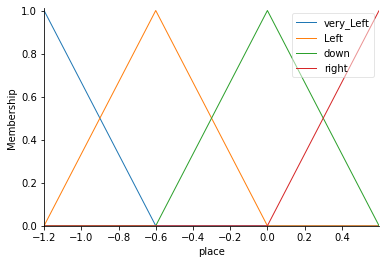

In [23]:
place.view()

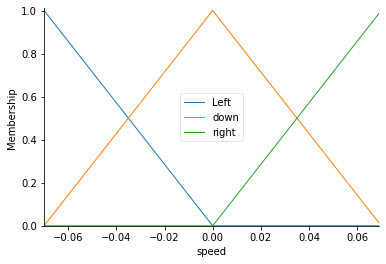

In [24]:
speed.view()

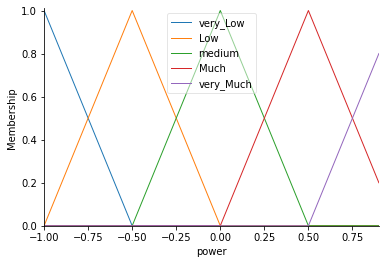

In [25]:
power.view()

In [26]:
rule1 = ctrl.Rule(place['very_Left'] & speed['Left'], power['very_Low'])
rule2 = ctrl.Rule(place['very_Left'] & speed['down'], power['medium'])
rule3 = ctrl.Rule(place['very_Left'] & speed['right'], power['very_Much'])

rule4 = ctrl.Rule(place['Left'] & speed['Left'], power['Low'])
rule5 = ctrl.Rule(place['Left'] & speed['down'], power['medium'])
rule6 = ctrl.Rule(place['Left'] & speed['right'], power['Much'])

rule7 = ctrl.Rule(place['down'] & speed['Left'], power['Low'])
rule8 = ctrl.Rule(place['down'] & speed['down'], power['medium'])
rule9 = ctrl.Rule(place['down'] & speed['right'], power['very_Much'])

rule10 = ctrl.Rule(place['right'] & speed['Left'], power['Low'])
rule11 = ctrl.Rule(place['right'] & speed['down'], power['medium'])
rule12 = ctrl.Rule(place['right'] & speed['right'], power['Much'])